# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

## Home Creditはどのような企業？

オランダに本社を置く国際的なノンバンク金融機関。10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への貸付に注力しています。2016年の時点で、同社はすでに1億1,100万人以上のアクティブな顧客にサービスを提供している。
主に貸付を行なっている企業です。

## このコンペティションでは何を予測する？

様々なデータから、顧客の返済能力の分析し返済可能な顧客を判断する

## それを予測することで企業が得られるメリットは何？

返済能力の高い顧客を選択できるようにすることで安全な貸付を行える。

# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す
- それぞれ結果に対する説明や考察も行ってください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./application_train.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
# 欠損値の有無を見る
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
False,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
True,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,41519,41519,41519,41519,41519,41519


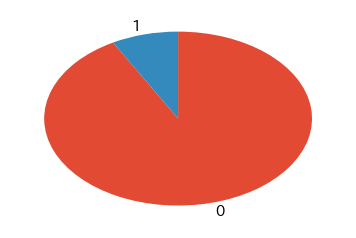

In [16]:
###TARGETデータ###
df2 = df["TARGET"].value_counts().values
label = ["0", "1"]
plt.pie(df2,labels=label,counterclock=False,startangle=90,)
plt.show();

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

課題：どの特徴量がTARGETの値に相関関係をもっているかわからない。<br>
仮説１：男女で返済能力の差はあるか<br>
仮説２：教育によって返済能力の差はあるか<br>
仮説３：ファミリーステータスによって返済能力の差はあるか

# 仮説１：男女で返済能力の差はあるか
男女の差で返済の能力差があるかもしれないので検証する。

In [18]:
#数値型でないデータを数値化する関数
for column in df.columns:
    labels, uniques = pd.factorize(df['CODE_GENDER'])
    df['CODE_GENDER'] = labels

In [19]:
display(df['CODE_GENDER'])

0         0
1         1
2         0
3         1
4         0
         ..
307506    0
307507    1
307508    1
307509    1
307510    1
Name: CODE_GENDER, Length: 307511, dtype: int64

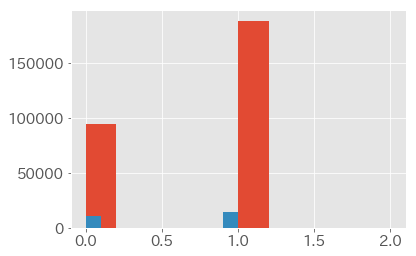

In [27]:
# グラフ
plt.hist(df["CODE_GENDER"][df['TARGET']==0], label='repaid')
plt.hist(df["CODE_GENDER"][df['TARGET']==1], label='notrepaid')
plt.show();

男性女性の返済の遅れを可視化すると右側の男性データの返済していない割合が、女性よりも大きいい事が読み取れる。

# 仮説２
相関係数が高かった'AMT_ANNUITY'と'AMT_CREDIT'を活用できそうか

In [86]:
df[["AMT_ANNUITY","AMT_CREDIT"]].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.770138
AMT_CREDIT,0.770138,1.000000


In [87]:
T_0 = df[df['TARGET']==0]
T_1 = df[df['TARGET']==1]

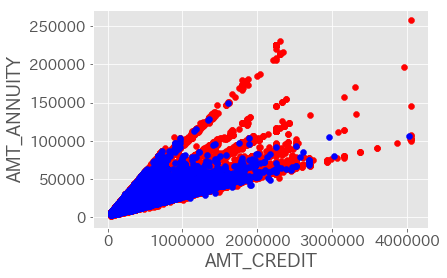

In [88]:
plt.scatter(T_0["AMT_CREDIT"], T_0["AMT_ANNUITY"], color='red')
plt.scatter(T_1["AMT_CREDIT"], T_1["AMT_ANNUITY"], color='blue')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show();

月額の返済額と借入額の大きさでは、遅れのある人は小さな借り入れをしがちなのかもしれない